In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load the datasets 
control_group=pd.read_csv('control_group.csv', delimiter=';')
test_group=pd.read_csv('test_group.csv', delimiter=';')

## Data Cleaning

In [2]:
# Convert Date column to datetime format
control_group['Date'] = pd.to_datetime(control_group['Date'], format='%d.%m.%Y', errors='coerce')
test_group['Date'] = pd.to_datetime(test_group['Date'], format='%d.%m.%Y', errors='coerce')

# Fill missing values in numeric columns with 0 (if it's appropriate)
control_group.fillna(0, inplace=True)
test_group.fillna(0, inplace=True)

Descriptive Statistics

In [3]:
print("\nDescriptive Statistics for Control Campaign:")
print(control_group.describe())

print("\nDescriptive Statistics for Test Campaign:")
print(test_group.describe())


Descriptive Statistics for Control Campaign:
                      Date  Spend [USD]  # of Impressions          Reach  \
count                   30    30.000000         30.000000      30.000000   
mean   2019-08-15 12:00:00  2288.433333     105907.766667   85883.433333   
min    2019-08-01 00:00:00  1757.000000          0.000000       0.000000   
25%    2019-08-08 06:00:00  1945.500000      91211.500000   69708.500000   
50%    2019-08-15 12:00:00  2299.500000     112368.000000   91418.000000   
75%    2019-08-22 18:00:00  2532.000000     121259.000000  101958.750000   
max    2019-08-30 00:00:00  3083.000000     145248.000000  127852.000000   
std                    NaN   367.334451      29228.406061   26894.781829   

       # of Website Clicks  # of Searches  # of View Content  \
count            30.000000      30.000000          30.000000   
mean           5143.433333    2147.266667        1879.000000   
min               0.000000       0.000000           0.000000   
25%          

## Exploratory Data Analysis (EDA)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


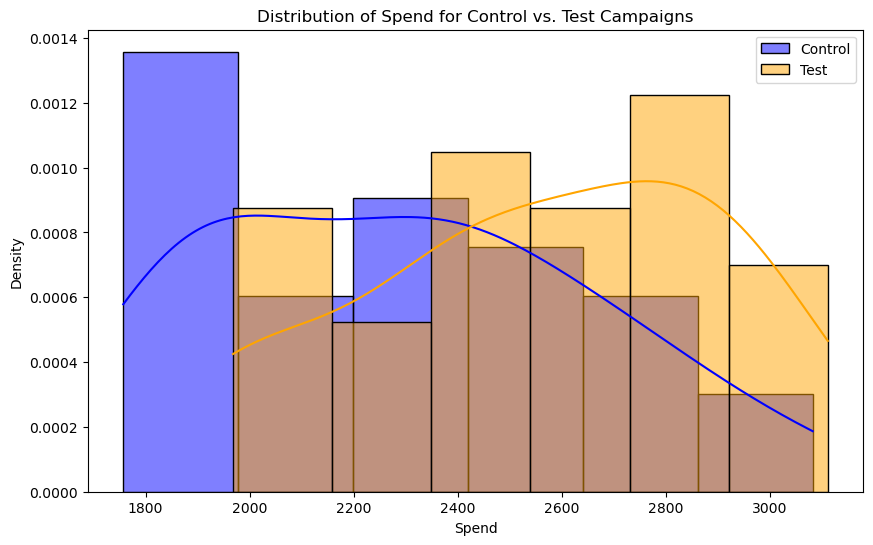

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


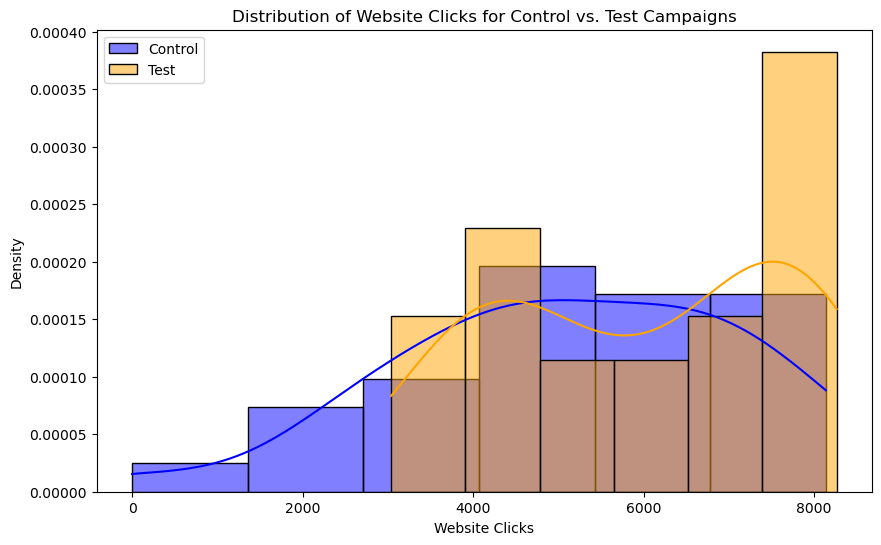

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


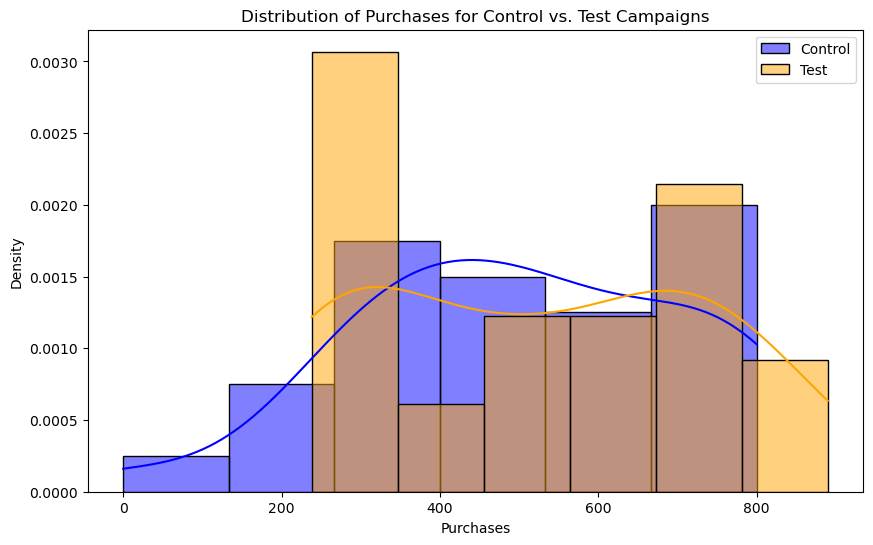

In [4]:
# Visualize metrics - Example: Spend, Website Clicks, Purchases
plt.figure(figsize=(10, 6))
sns.histplot(control_group['Spend [USD]'], color="blue", label="Control", kde=True, stat="density")
sns.histplot(test_group['Spend [USD]'], color="orange", label="Test", kde=True, stat="density")
plt.title('Distribution of Spend for Control vs. Test Campaigns')
plt.xlabel('Spend')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(control_group['# of Website Clicks'], color="blue", label="Control", kde=True, stat="density")
sns.histplot(test_group['# of Website Clicks'], color="orange", label="Test", kde=True, stat="density")
plt.title('Distribution of Website Clicks for Control vs. Test Campaigns')
plt.xlabel('Website Clicks')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(control_group['# of Purchase'], color="blue", label="Control", kde=True, stat="density")
sns.histplot(test_group['# of Purchase'], color="orange", label="Test", kde=True, stat="density")
plt.title('Distribution of Purchases for Control vs. Test Campaigns')
plt.xlabel('Purchases')
plt.ylabel('Density')
plt.legend()
plt.show()

## A/B Test - T-Test for Multiple Metrics

In [5]:
# T-test for Spend
control_spend = control_group['Spend [USD]'].dropna()
test_spend = test_group['Spend [USD]'].dropna()

t_stat_spend, p_value_spend = stats.ttest_ind(control_spend, test_spend, equal_var=False)
print("\nT-test for Spend:")
print(f'T-statistic: {t_stat_spend:.4f}')
print(f'P-value: {p_value_spend:.4f}')

# T-test for Website Clicks
control_clicks = control_group['# of Website Clicks'].dropna()
test_clicks = test_group['# of Website Clicks'].dropna()

t_stat_clicks, p_value_clicks = stats.ttest_ind(control_clicks, test_clicks, equal_var=False)
print("\nT-test for Website Clicks:")
print(f'T-statistic: {t_stat_clicks:.4f}')
print(f'P-value: {p_value_clicks:.4f}')

# T-test for Purchases
control_purchases = control_group['# of Purchase'].dropna()
test_purchases = test_group['# of Purchase'].dropna()

t_stat_purchases, p_value_purchases = stats.ttest_ind(control_purchases, test_purchases, equal_var=False)
print("\nT-test for Purchases:")
print(f'T-statistic: {t_stat_purchases:.4f}')
print(f'P-value: {p_value_purchases:.4f}')


T-test for Spend:
T-statistic: -2.9700
P-value: 0.0043

T-test for Website Clicks:
T-statistic: -1.8610
P-value: 0.0679

T-test for Purchases:
T-statistic: -0.2951
P-value: 0.7689


## ROI and Conversion Rates (Advanced Insights)

In [6]:
 # Define revenue per purchase (assumption)
revenue_per_purchase = 50  # Example assumption

# Calculate conversion rates
control_conversion_rate = (control_group['# of Purchase'].sum() / control_group['# of Impressions'].sum()) * 100
test_conversion_rate = (test_group['# of Purchase'].sum() / test_group['# of Impressions'].sum()) * 100

# Calculate ROI for Control Campaign
total_revenue_control = control_group['# of Purchase'].sum() * revenue_per_purchase
total_spend_control = control_group['Spend [USD]'].sum()
control_roi = (total_revenue_control - total_spend_control) / total_spend_control * 100

# Calculate ROI for Test Campaign
total_revenue_test = test_group['# of Purchase'].sum() * revenue_per_purchase
total_spend_test = test_group['Spend [USD]'].sum()
test_roi = (total_revenue_test - total_spend_test) / total_spend_test * 100

# Output Conversion Rates and ROI
print(f"\nControl Campaign Conversion Rate: {control_conversion_rate:.2f}%")
print(f"Test Campaign Conversion Rate: {test_conversion_rate:.2f}%")

print(f"\nControl Campaign ROI: {control_roi:.2f}%")
print(f"Test Campaign ROI: {test_roi:.2f}%")


Control Campaign Conversion Rate: 0.48%
Test Campaign Conversion Rate: 0.70%

Control Campaign ROI: 1004.18%
Test Campaign ROI: 916.82%


## Final Recommendation

In [7]:
if test_conversion_rate > control_conversion_rate and test_roi > control_roi:
    print("\nThe Test Campaign is more effective based on conversion rate and ROI.")
else:
    print("\nThe Control Campaign is more effective or there is no clear winner.")


The Control Campaign is more effective or there is no clear winner.
